In [1]:
a <- data.frame('a' = c(1,2,3),'b'=c('A','B','C'),'c'=c(0,0,0))

In [2]:
a

a,b,c
<dbl>,<fct>,<dbl>
1,A,0
2,B,0
3,C,0


In [8]:
b <- a[-which(a$b=='A'),]
b

,a,b,c
,<dbl>,<fct>,<dbl>
2,2,B,0
3,3,C,0


In [10]:
library(ggplot2)

In [12]:
load('Data_Pro0.RData')

In [13]:
#stas all
Site    <-   c ("Kattegat","Urdaibai","Saronikos", "Kattegat","Urdaibai","Saronikos","Kattegat","Urdaibai","Saronikos")
Variable<-   c("GODAS_Pottemp","GODAS_Pottemp","GODAS_Pottemp","GODAS_5m","GODAS_5m","GODAS_5m","Obs_SST","Obs_SST","Obs_SST")
Slope   <-   c("0.021","0.014","0.022","0.021", "0.043","0.037","-0.007","0.012","0.107")
R2      <-   c("0.344", "0.017", "0.282","0.344", "0.402", "0.626","-0.067","-0.009","0.287")
p_value <-   c("<0.001", ">0.05", "<0.001","<0.001", "<0.001", "<0.001",">0.05",">0.05","<0.01")
Year    <-   rep (c("Year"), times=c(9))
Data_stats_w<- data.frame (Slope, R2, p_value, Site, Year, Variable)

p3 <- ggplot(Data_Pro0, aes(x=Year, y=Temperature, col=Variable)) + geom_point(aes(color = Variable), size=1.5) +
 geom_smooth(data=subset(Data_Pro0,Site=="Saronikos" | Site=="Saronikos" | Site=="Saronikos" |
                           Variable=="Obs_SST" | Variable=="GODAS_5m" | Variable=="GODAS_Pottemp" |
                           Site=="Urdaibai" | Site=="Urdaibai" | Variable=="GODAS_5m" | Variable=="GODAS_Pottemp"),method = lm, se=TRUE,aes(fill=Variable)) +
 scale_color_manual(values = c("#00AFBB", "#E7B800","#FC4E07"))+
 scale_fill_manual(values = c("#00AFBB", "#E7B800","#FC4E07")) + theme_bw() + facet_grid(Variable~Site)
p3<-  p3 +  theme(panel.grid.major=element_blank(), panel.grid.minor=element_blank())
p3 <- p3 + ylab ("Temperature ('C)")+  xlab("Year")
p3 <- p3 + theme (axis.title=element_text(size=24))
p3 <- p3 + theme(text = element_text(size=24))
p3 <- p3 + theme  (axis.text.x = element_text(size = 24))
p3 <- p3 + theme  (axis.text.y = element_text(size = 2))
p3 <- p3 + theme(strip.text.x = element_text(size = 24, color = "black"))
p3 <- p3 + theme(strip.text.y = element_text(size = 24, color = "black"))
p3 <- p3 + theme(legend.title = element_blank()) + theme(legend.position = c(0.07, 0.94))
p3 <- p3 + theme(legend.text=element_text(size=16))
p3 <- p3 + geom_text(data = Data_stats_w,aes(group=Variable, label = paste("slope:", Slope,  "r^2:", R2, "p-value: ", p_value, sep="  "), x = 1999, y= 13), size=6, color="black")

In [29]:
data1<- Data_Pro0[which((Data_Pro0$Variable=="GODAS_Pottemp" | Data_Pro0$Variable=="Obs_SST") & Data_Pro0$Site=="Kattegat"),]

In [30]:
data1$Site == "Saronikos"

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

In [2]:
library(tidyverse)

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


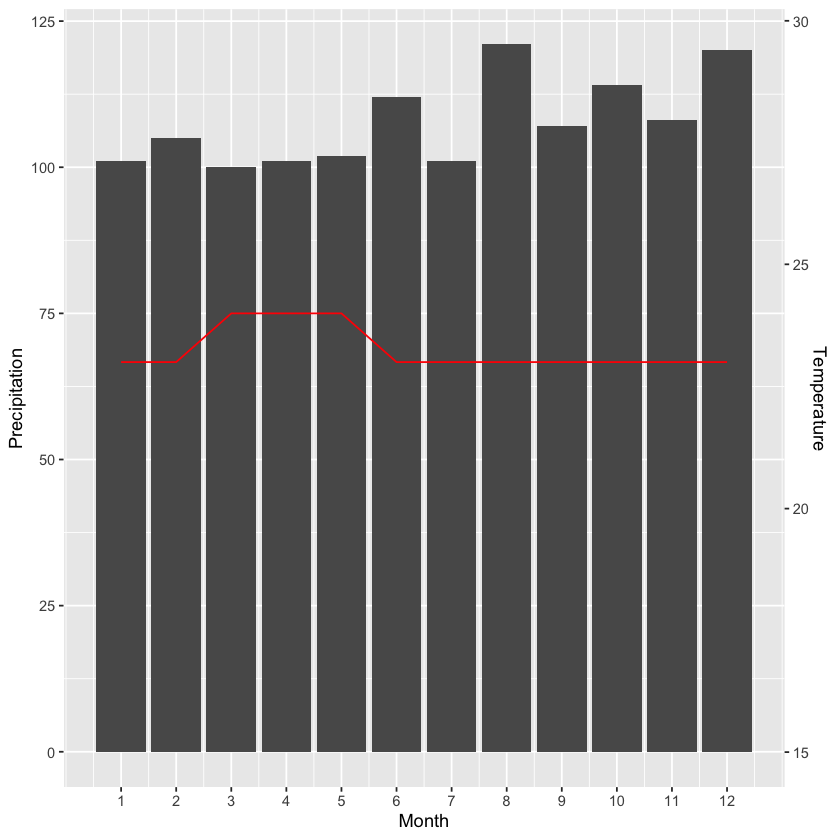

In [3]:
climate <- tibble(
  Month = 1:12,
  Temp = c(23,23,24,24,24,23,23,23,23,23,23,23),
  Precip = c(101,105,100,101,102, 112, 101, 121, 107, 114, 108, 120)
  )

ylim.prim <- c(0, 125)   # in this example, precipitation
ylim.sec <- c(15, 30)    # in this example, temperature

b <- diff(ylim.prim)/diff(ylim.sec)
a <- b*(ylim.prim[1] - ylim.sec[1])

ggplot(climate, aes(Month, Precip)) +
  geom_col() +
  geom_line(aes(y = a + Temp*b), color = "red") +
  scale_y_continuous("Precipitation", sec.axis = sec_axis(~ (. - a)/b, name = "Temperature"),) +
  scale_x_continuous("Month", breaks = 1:12) 

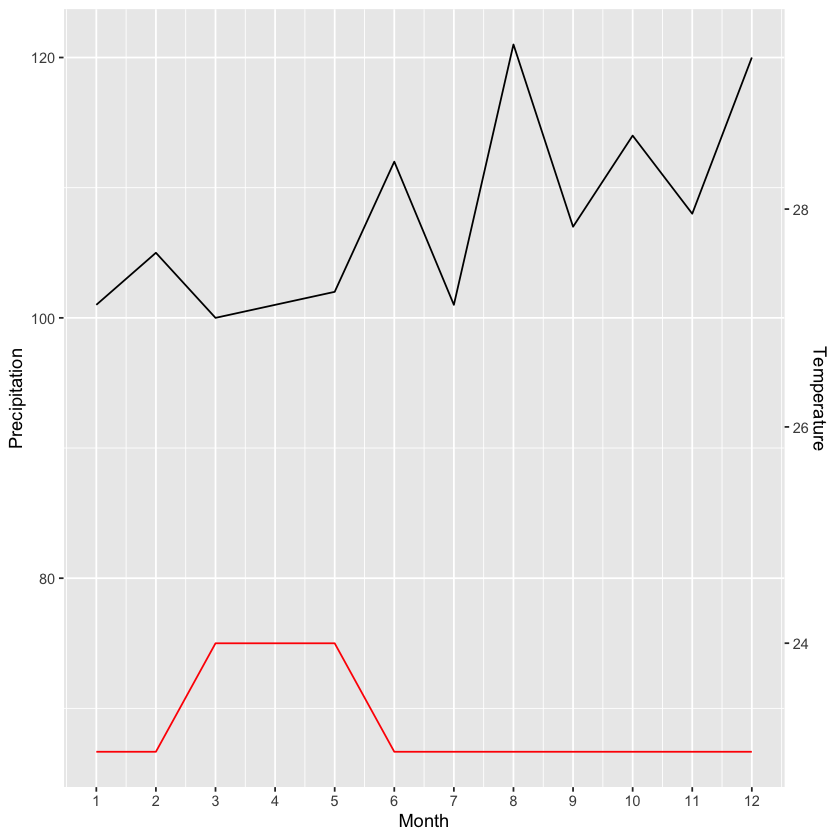

In [4]:
ylim.prim <- c(0, 125)   # in this example, precipitation
ylim.sec <- c(15, 30)    # in this example, temperature

b <- diff(ylim.prim)/diff(ylim.sec)
a <- b*(ylim.prim[1] - ylim.sec[1])

ggplot(climate, aes(Month, Precip)) +
  geom_line() +
  geom_line(aes(y = a + Temp*b), color = "red") +
  scale_y_continuous("Precipitation", sec.axis = sec_axis(~ (. - a)/b, name = "Temperature"),) +
  scale_x_continuous("Month", breaks = 1:12)  

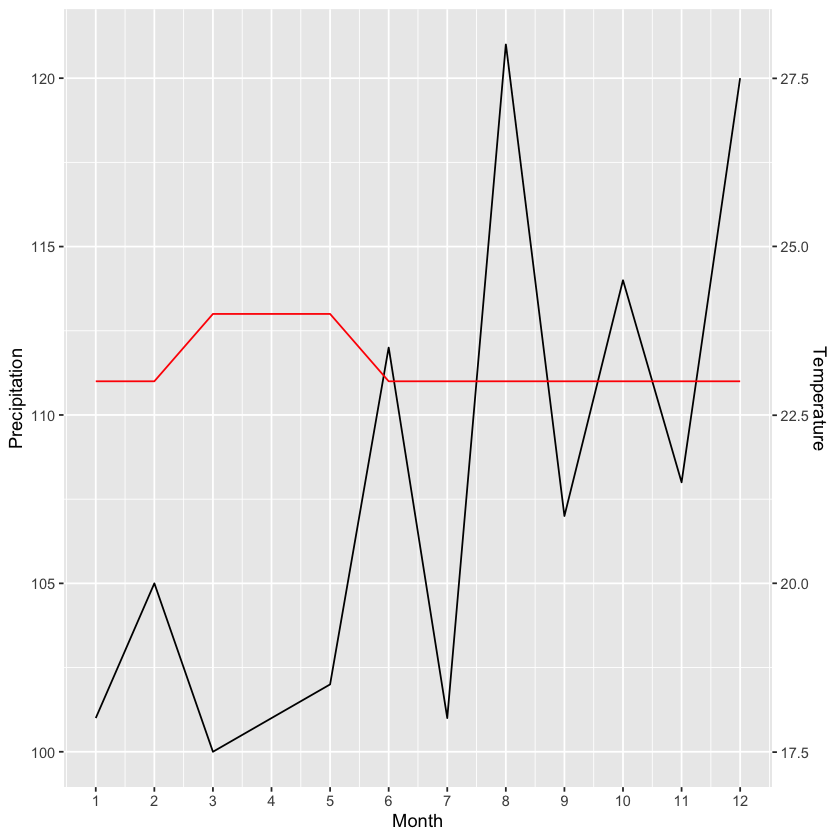

In [93]:
ylim.prim <- c(95, 125)   # in this example, precipitation
ylim.sec <- c(15, 30)    # in this example, temperature

b <- diff(ylim.prim)/diff(ylim.sec)
a <- ylim.prim[1] - b*ylim.sec[1]

ggplot(climate, aes(Month, Precip)) +
  geom_line() +
  geom_line(aes(y = a + Temp*b), color = "red") +
  scale_y_continuous("Precipitation", sec.axis = sec_axis(~ (. - a)/b, name = "Temperature"),) +
  scale_x_continuous("Month", breaks = 1:12) 

In [72]:
climate$Temp

[1] 23 23 24 24 24 23 23 23 23 23 23 23

[1] 105   2


Scale for 'y' is already present. Adding another scale for 'y', which will
replace the existing scale.


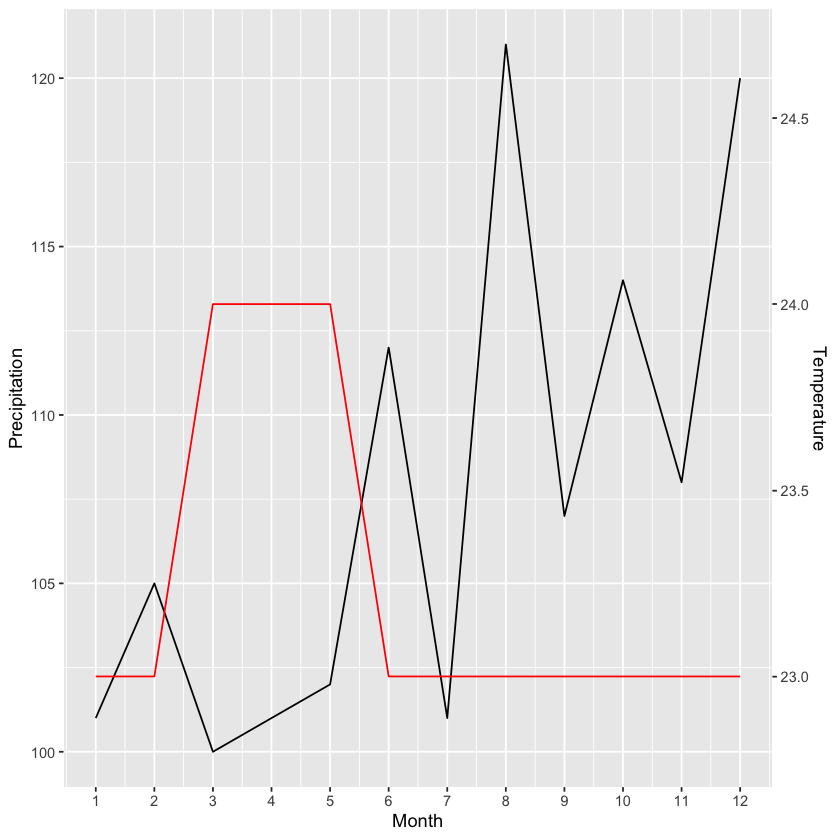

In [90]:
ylim.prim <- c(95, 125)   # in this example, precipitation
ylim.sec <- c(15, 30)    # in this example, temperature

b <- diff(ylim.prim)/diff(ylim.sec)
a <- ylim.prim[1] + 10
scalingfactor <- 5

print(c(a,b))
TEMP <- climate$Temp

ggplot(climate, aes(Month, Precip)) +
  geom_line() + ylim(ylim.prim) +
  geom_line(aes(y = (a + ((Temp - mean(TEMP))/sd(TEMP)) *scalingfactor) ), color = "red") +
  scale_y_continuous("Precipitation", sec.axis = sec_axis(~ (. - a) / scalingfactor * sd(TEMP) +mean(TEMP), name = "Temperature"),) +
  scale_x_continuous("Month", breaks = 1:12) 

In [91]:
ggsave('plotstackoverflow.png')

Saving 7 x 7 in image
